### In this study, we will check the breakdown voltage measured with two different PreAmps Boards. As expected, we want to prove that the preAmp desgin does not matter for this measurement. Being this, an intrisic SiPM characteristic.

In [68]:

import numpy as np
import matplotlib.pyplot as plt

# Import necessary packages

import pandas as pd
from time import sleep

In [69]:

csv_file = 'defbuffer1_0716_180111.csv'
data_nEXOPreAmp_usb = pd.read_csv(csv_file, skiprows=8,usecols=['Reading', 'Value'])  
# Read the CSV file into a pandas DataFrame

csv_file = '../FirstSiPM_ScopeData/defbuffer1_0622_051813.csv'
data_firstPreAmp = pd.read_csv(csv_file, skiprows=8,usecols=['Reading', 'Value'])  
# Read the CSV file into a pandas DataFrame

csv_file = 'SiPM_IV_Curve20240716.csv'
data_nEXOPreAmp = pd.read_csv(csv_file, skiprows=0,usecols=['Current (A)', 'Voltage (V)'])  

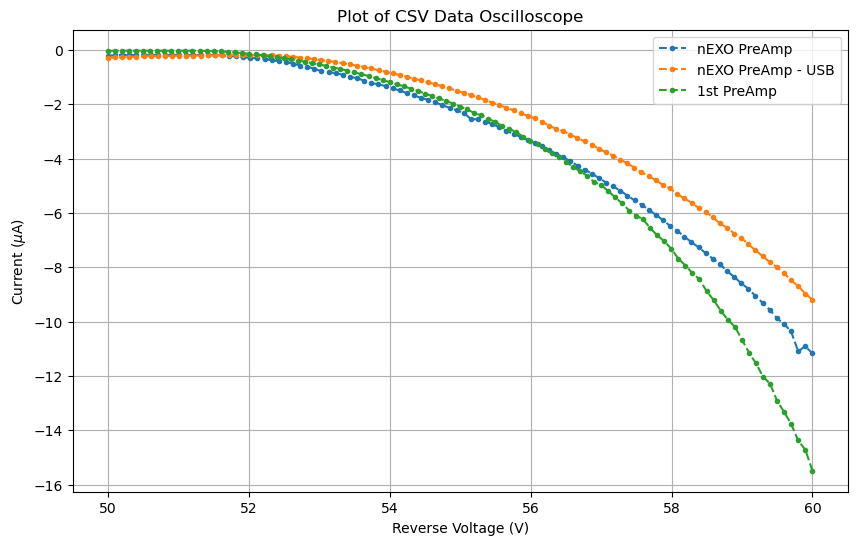

In [70]:
# Extract the columns
voltage_firstPreAmp = data_firstPreAmp.iloc[:, 1]  # the first column is seconds
current_firstPreAmp = data_firstPreAmp.iloc[:, 0]*10**6  # the second column is Volts

voltage_nEXOPreAmp_usb = data_nEXOPreAmp_usb.iloc[:, 1]  # the first column is seconds
current_nEXOPreAmp_usb = data_nEXOPreAmp_usb.iloc[:, 0]*10**6  # the second column is Volts

voltage_nEXOPreAmp = data_nEXOPreAmp.iloc[:, 0]  # the first column is seconds
current_nEXOPreAmp = data_nEXOPreAmp.iloc[:, 1]*10**6  # the second column is Volts

voltage_nEXOPreAmp = np.array(voltage_nEXOPreAmp)
current_nEXOPreAmp = np.array(current_nEXOPreAmp)

current_nEXOPreAmp = current_nEXOPreAmp[voltage_nEXOPreAmp<=-50] 
voltage_nEXOPreAmp = voltage_nEXOPreAmp[voltage_nEXOPreAmp<=-50] 


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(-voltage_nEXOPreAmp, current_nEXOPreAmp, marker='.', linestyle='--', label = 'nEXO PreAmp')
plt.plot(-voltage_nEXOPreAmp_usb, current_nEXOPreAmp_usb, marker='.', linestyle='--', label = 'nEXO PreAmp - USB')
plt.plot(-voltage_firstPreAmp, current_firstPreAmp, marker='.', linestyle='--', label = '1st PreAmp')
plt.ylabel(r'Current ($\mu$A)')
plt.xlabel('Reverse Voltage (V)')
plt.title('Plot of CSV Data Oscilloscope')
plt.legend()
plt.grid()

plt.show()

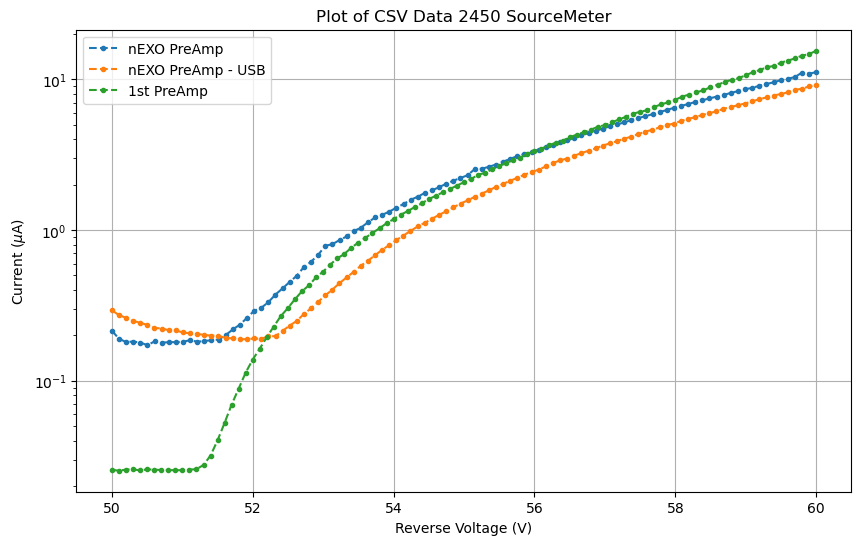

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(-voltage_nEXOPreAmp, -current_nEXOPreAmp, marker='.', linestyle='--', label = 'nEXO PreAmp')
plt.plot(-voltage_nEXOPreAmp_usb, -current_nEXOPreAmp_usb, marker='.', linestyle='--', label = 'nEXO PreAmp - USB')
plt.plot(-voltage_firstPreAmp, -current_firstPreAmp, marker='.', linestyle='--', label = '1st PreAmp')
plt.yscale('log')
plt.ylabel(r'Current ($\mu$A)')
plt.xlabel('Reverse Voltage (V)')
plt.title('Plot of CSV Data 2450 SourceMeter')
plt.legend()
plt.grid()

[ -0.2154995  -0.1900534  -0.1810947  -0.1821337  -0.1796474  -0.1723653
  -0.1827032  -0.1792251  -0.180473   -0.1807011  -0.1815121  -0.1863141
  -0.1816381  -0.1838356  -0.185881   -0.1880152  -0.2011804  -0.2193049
  -0.2360873  -0.262029   -0.2915043  -0.3050355  -0.332718   -0.3737222
  -0.4107902  -0.4533633  -0.4984079  -0.5696826  -0.6167792  -0.6852322
  -0.7878176  -0.8061622  -0.8585901  -0.9075275  -0.9846675  -1.037908
  -1.125936   -1.213014   -1.262783   -1.326033   -1.409233   -1.489237
  -1.586594   -1.667175   -1.764436   -1.835096   -1.927619   -2.029664
  -2.12715    -2.215985   -2.31256    -2.539595   -2.552377   -2.631202
  -2.722643   -2.84364    -2.971404   -3.094212   -3.194332   -3.310579
  -3.422243   -3.537825   -3.685969   -3.832361   -3.944048   -4.09543
  -4.254594   -4.402076   -4.547353   -4.712842   -4.878651   -5.020021
  -5.178198   -5.359052   -5.533307   -5.696438   -5.878263   -6.068261
  -6.261571   -6.47425    -6.65203    -6.869177   -7.073229 

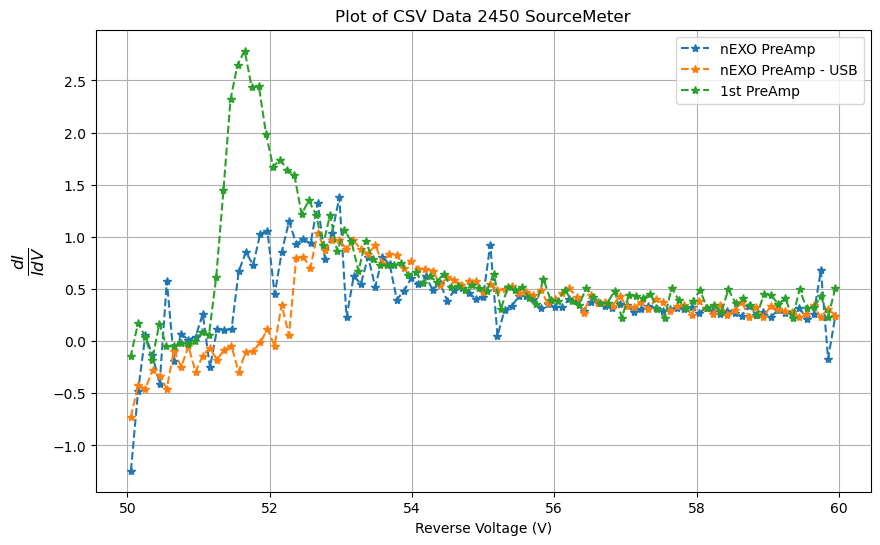

In [72]:


current_nEXOPreAmp_usb = np.array(current_nEXOPreAmp_usb)
current_firstPreAmp = np.array(current_firstPreAmp)

voltage_firstPreAmp = np.array(voltage_firstPreAmp)
der_firstAmp = np.diff(np.array(-current_firstPreAmp)) / np.diff(voltage_firstPreAmp)
x2_firstAmp = (voltage_firstPreAmp[:-1] + voltage_firstPreAmp[1:]) / 2

voltage_nEXOPreAmp_usb = np.array(voltage_nEXOPreAmp_usb)
der_nEXOPreAmp_usb = np.diff(np.array(-current_nEXOPreAmp_usb)) / np.diff(voltage_nEXOPreAmp_usb) 
x2_nEXOPreAmp_usb = (voltage_nEXOPreAmp_usb[:-1] + voltage_nEXOPreAmp_usb[1:]) / 2

voltage_nEXOPreAmp = np.array(voltage_nEXOPreAmp)
der_nEXOPreAmp = np.diff(np.array(-current_nEXOPreAmp)) / np.diff(voltage_nEXOPreAmp)
x2_nEXOPreAmp = (voltage_nEXOPreAmp[:-1] + voltage_nEXOPreAmp[1:]) / 2

print(current_nEXOPreAmp)
print(current_nEXOPreAmp_usb)
current_nEXOPreAmp = (current_nEXOPreAmp[1:] + current_nEXOPreAmp[:-1]) / 2
current_nEXOPreAmp_usb = (current_nEXOPreAmp_usb[1:] + current_nEXOPreAmp_usb[:-1]) / 2
current_firstPreAmp = (current_firstPreAmp[1:] + current_firstPreAmp[:-1]) / 2
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(-x2_nEXOPreAmp, der_nEXOPreAmp/current_nEXOPreAmp, marker='*', linestyle='--', label = 'nEXO PreAmp')
plt.plot(-x2_nEXOPreAmp_usb, der_nEXOPreAmp_usb/current_nEXOPreAmp_usb, marker='*', linestyle='--', label = 'nEXO PreAmp - USB')
plt.plot(-x2_firstAmp, der_firstAmp/current_firstPreAmp, marker='*', linestyle='--', label = '1st PreAmp')

plt.ylabel(r'$\frac{dI}{IdV}$', fontsize =17, rotation = 'vertical')
plt.legend()
plt.grid()
plt.xlabel('Reverse Voltage (V)')
plt.title('Plot of CSV Data 2450 SourceMeter')

plt.show()

#### The data with the nEXO PreAmp was took automatically with a python script, while the 1st preAmp was saved in flash drive directly from the Power Supply.